# Covid Tracking Project ([The website](https://covidtracking.com/))

## Dr. Tirthajyoti Sarkar, Fremont, CA, April 2020

---

## What is _"Covid Tracking Project"_?

The following descriptions are collected directly from the [project website](https://covidtracking.com/).

"**The COVID Tracking Project collects and publishes the most complete testing data available for US states and territories**.

It has been cited in and used by major media companies and agencies.

![1](https://raw.githubusercontent.com/tirthajyoti/Covid-19-analysis/master/images/Covid-tracking-project-1.PNG)

The COVID Tracking Project exists because every person, newsroom, and government agency in the United States deserves access to the most complete picture of COVID-19 testing data that can be assembled.

**Understanding the shape, speed, and location of regional outbreaks requires the entire testing picture**: how many people have actually been tested in each state/territory, when they were tested, and what their results were. That’s where their data comes in.

**Because we have no complete official account of COVID-19 testing data in the US, we have to get this data from the public health authority in each US state and territory (and the District of Columbia)**. Each of these authorities reports its data in its own way, including online dashboards, data tables, PDFs, press conferences, tweets, and Facebook posts. And while many states and territories have slowly moved toward more standard ways of reporting, the actual categories of information are still in flux.

Our data team uses website-scrapers and trackers to alert us to changes, but the **actual updates to our dataset are done manually by careful humans** who double-check each change and extensively annotate changes areas of ambiguity. The work of data-gathering from official sources is also now supplemented by a fast-growing group of reporters who are constantly pushing authorities to release more comprehensive information."

Some of the visualizations example are shown below,

![2](https://raw.githubusercontent.com/tirthajyoti/Covid-19-analysis/master/images/Covid-tracking-project-2.PNG)


## What is this Notebook about?

In this Jupyter notebook, we will show the step-by-step code and examples of creating impactful visualizations and charts using simple Python programming.

## My COVID-19 Github repo
Other COVID-19 related Notebooks are in my **[Github repo here](https://github.com/tirthajyoti/Covid-19-analysis)**

---

## Code and demo

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

### Define the URL and get the content

In [2]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

### Read in a Pandas DataFRame

In [3]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

### Converts dates to a specific format

In [4]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

### Drops unnecessary column(s)

In [5]:
df.drop(['dateChecked'],axis=1,inplace=True)

### Converts the `state` data to string-type

In [6]:
df['state']=df['state'].apply(str)

### Checking the general information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      3489 non-null   datetime64[ns]
 1   state                     3489 non-null   object        
 2   positive                  3474 non-null   float64       
 3   negative                  3307 non-null   float64       
 4   pending                   695 non-null    float64       
 5   hospitalizedCurrently     1311 non-null   float64       
 6   hospitalizedCumulative    1335 non-null   float64       
 7   inIcuCurrently            662 non-null    float64       
 8   inIcuCumulative           259 non-null    float64       
 9   onVentilatorCurrently     527 non-null    float64       
 10  onVentilatorCumulative    82 non-null     float64       
 11  recovered                 1160 non-null   float64       
 12  dataQualityGrade    

### Peeking into the data

In [8]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-05-06,AK,372.0,23283.0,NaN,8.0,NaN,NaN,NaN,NaN,...,NaN,23655,23655,23655,2,1.0,0.0,962.0,1.0,963.0
1,2020-05-06,AL,8581.0,100935.0,NaN,NaN,1158.0,NaN,442.0,NaN,...,1158.0,109516,109516,109516,1,27.0,51.0,2454.0,296.0,2750.0
2,2020-05-06,AR,3568.0,55435.0,NaN,69.0,453.0,NaN,NaN,14.0,...,453.0,59003,59003,59003,5,5.0,0.0,4296.0,72.0,4368.0
3,2020-05-06,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,2020-05-06,AZ,9707.0,82030.0,NaN,754.0,1430.0,286.0,NaN,193.0,...,1430.0,91737,91737,91737,4,31.0,33.0,3075.0,402.0,3477.0


### Replacing the `NaN` by -1

In [9]:
df.fillna(value=-1, inplace=True)

In [10]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-05-06,AK,372.0,23283.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,23655,23655,23655,2,1.0,0.0,962.0,1.0,963.0
1,2020-05-06,AL,8581.0,100935.0,-1.0,-1.0,1158.0,-1.0,442.0,-1.0,...,1158.0,109516,109516,109516,1,27.0,51.0,2454.0,296.0,2750.0
2,2020-05-06,AR,3568.0,55435.0,-1.0,69.0,453.0,-1.0,-1.0,14.0,...,453.0,59003,59003,59003,5,5.0,0.0,4296.0,72.0,4368.0
3,2020-05-06,AS,0.0,83.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,2020-05-06,AZ,9707.0,82030.0,-1.0,754.0,1430.0,286.0,-1.0,193.0,...,1430.0,91737,91737,91737,4,31.0,33.0,3075.0,402.0,3477.0


### Function to plot a bar chart of the given variable/state 

In [11]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

### Some test plots...

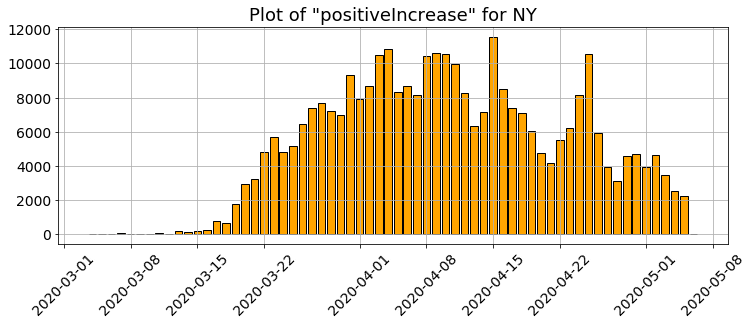

In [12]:
plot_var()

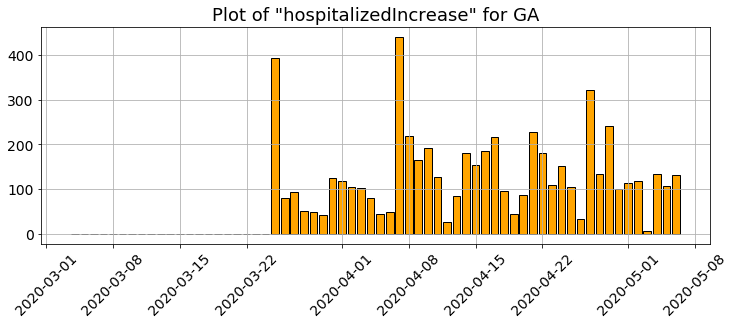

In [13]:
plot_var('hospitalizedIncrease','GA')

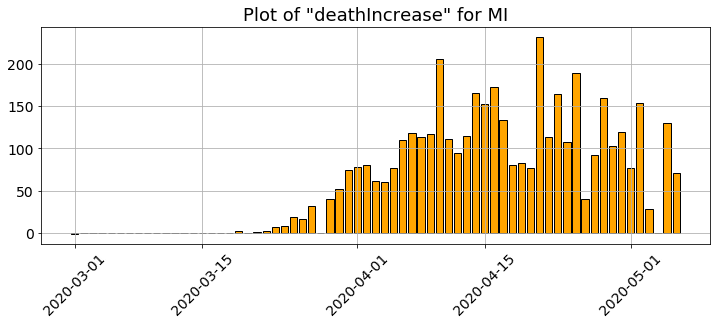

In [14]:
plot_var('deathIncrease','MI')

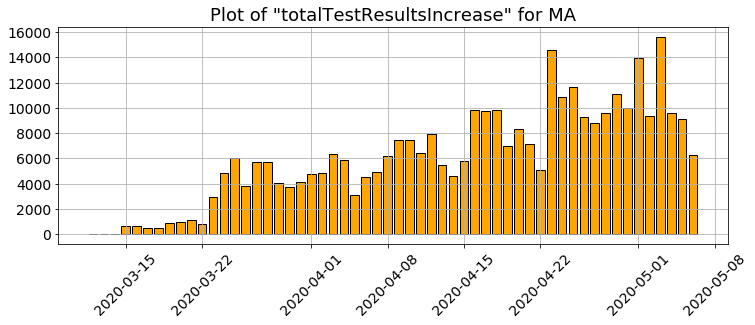

In [15]:
plot_var('totalTestResultsIncrease','MA')

### Function to create scatter plot of two variables for a given state

In [16]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

### Test some plots...

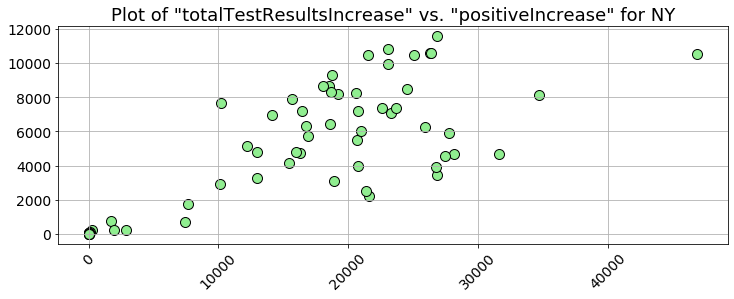

In [17]:
plot_xy(state='NY')

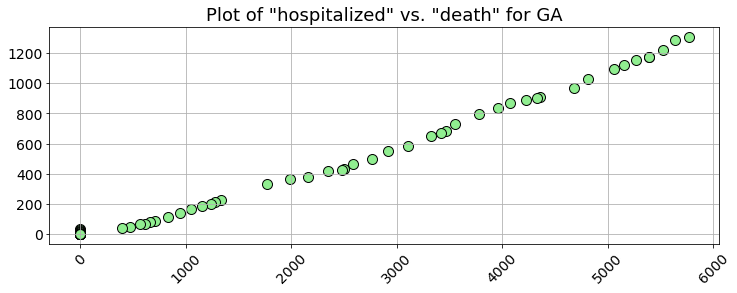

In [18]:
plot_xy('hospitalized','death','GA')

In [19]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


### Testing tracker function

Testing is crucially important to track the spread of the virus and contain it. Let us see how states the doing on this aspect relatively.

In [20]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()        

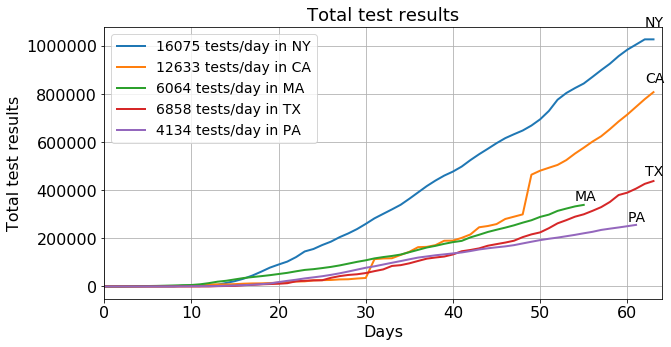

In [21]:
plotTesting()

### Function to compute fatality ratio (with the latest data)

In [22]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

### Function to compute hospitalization ratio (with the latest data)

In [23]:
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

### Function to compute positive case/total test ratio (with the latest data)

In [24]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

### Function to calculate recovery ratio (with the latest data)

In [25]:
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

### Fatality ratio chart

We will plot the chart with six states,

- California
- New York
- Michigan
- Massachusetts
- Pennsylvania
- Illinois

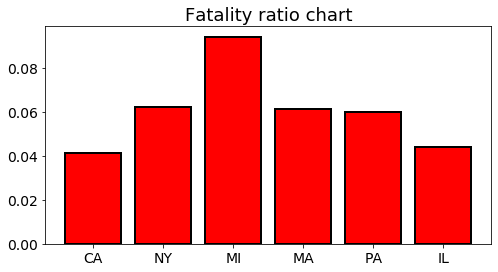

In [26]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

### Hospitalization chart
The next hospitalization rate chart is tried for the same set of states but only two of them reports proper data. Therefore, the code plots the chart only for those states.

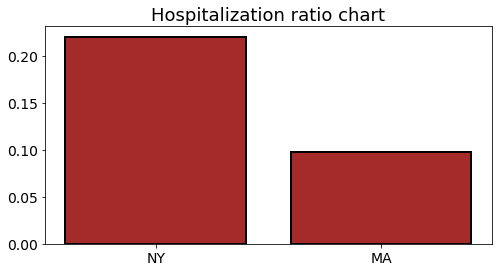

In [27]:
states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='brown',
        edgecolor='k',linewidth=2)
plt.show()

### Test-positive ratio chart

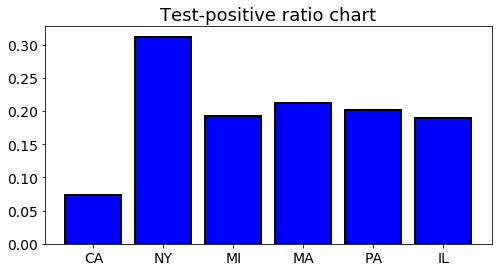

In [28]:
states = ['CA','NY','MI','MA','PA','IL']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

### Bubble charts...

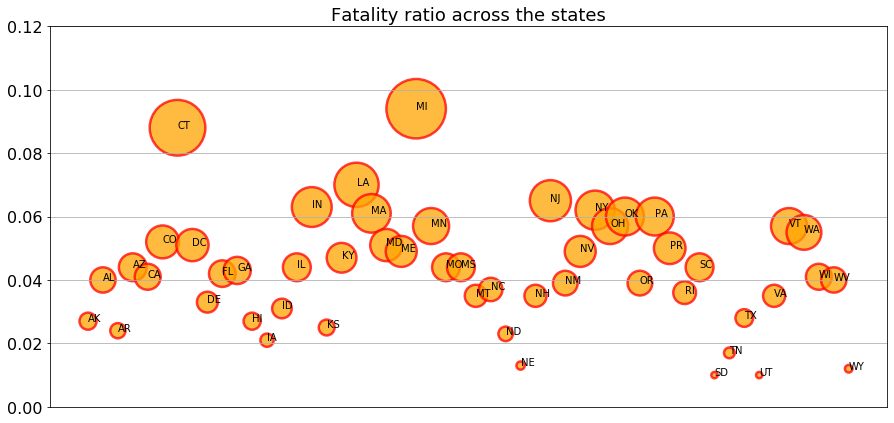

In [29]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

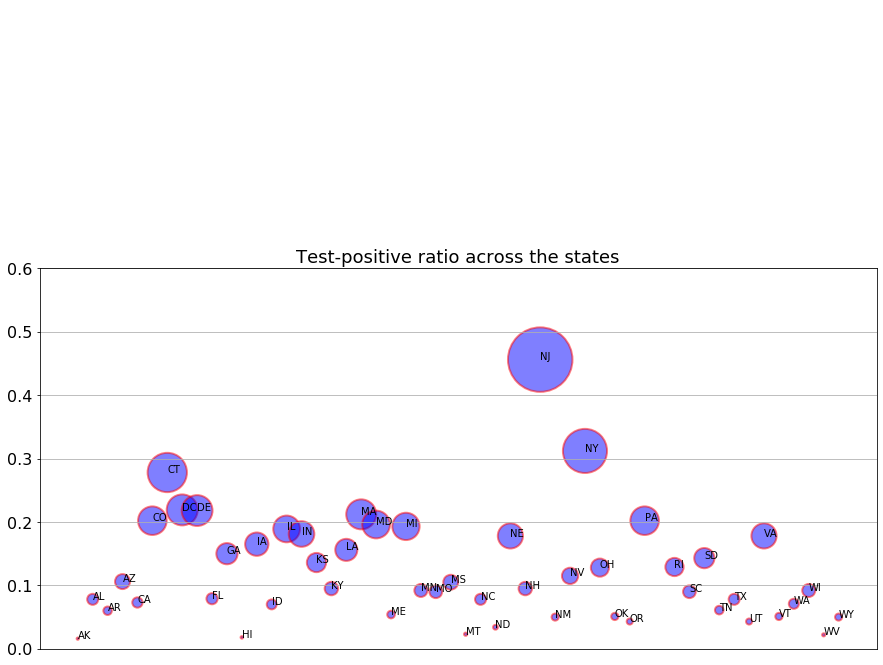

In [30]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

### The crucial question: _"Which states have 14 days of decreasing case counts?"_

In [31]:
def caseCountsdecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

### Plot for a few states

We will note that **no state, so far, has shown a consistent decrease of new cases for the last 14 days**!

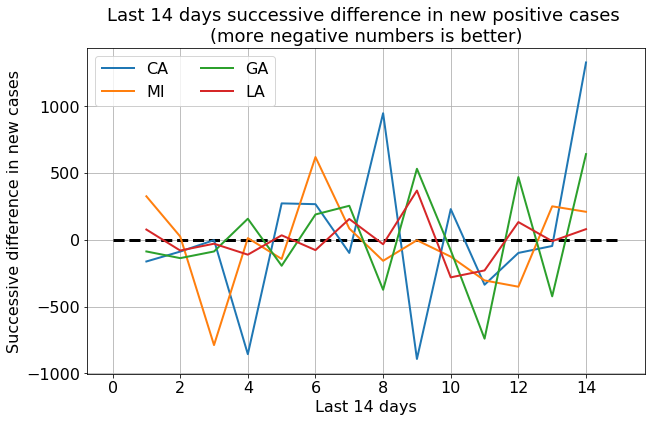

In [32]:
states = ['CA','MI','GA','LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

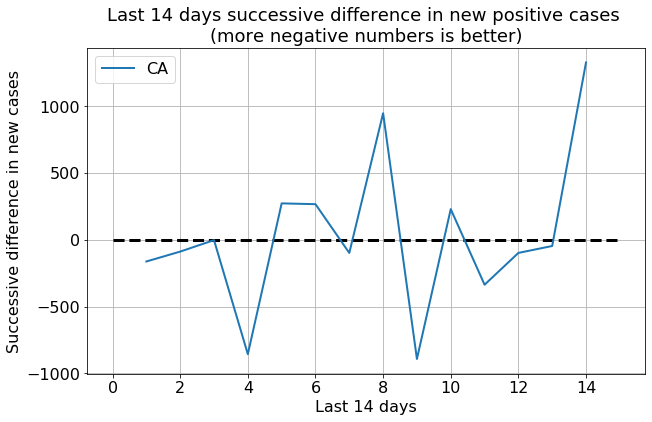

In [33]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

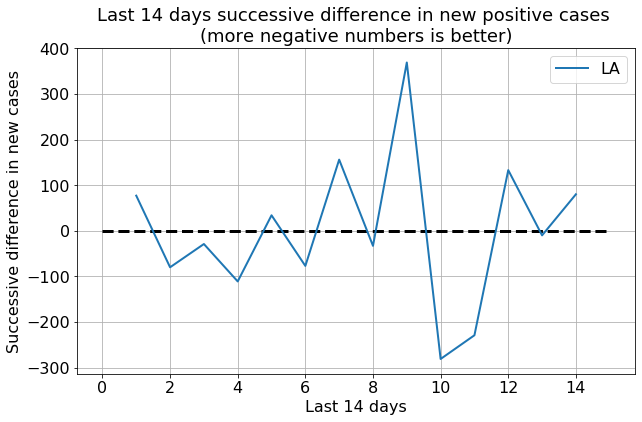

In [34]:
states = ['LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()